In [18]:
from scipy.interpolate import interp1d
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np

In [67]:
df = Table.read('../catalogs/Wright/2xGaiaDR3_wright.vot')
df

Name,RAJ2000,DEJ2000,Cluster,Dist,Vmag,V-K,SpT,logLx,Prot,M_,R_,L_,Teff,dcz,Lx_bol,recno,ra_epoch2000,dec_epoch2000,errHalfMaj,errHalfMin,errPosAng,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,astrometric_n_good_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,pseudocolour,pseudocolour_error,visibility_periods_used,ruwe,duplicated_source,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_mag,phot_rp_mean_flux,phot_rp_mean_mag,phot_bp_rp_excess_factor,bp_rp,dr2_radial_velocity,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,panstarrs1,sdssdr13,skymapper2,urat1,phot_g_mean_mag_error,phot_bp_mean_mag_error,phot_rp_mean_mag_error,phot_g_mean_mag_corrected,phot_g_mean_mag_error_corrected,phot_g_mean_flux_corrected,phot_bp_rp_excess_factor_corrected,ra_epoch2000_error,dec_epoch2000_error,ra_dec_epoch2000_corr,angDist
,,,,pc,mag,mag,,log(1e-07W),d,solMass,solRad,solLum,K,,,,deg,deg,arcsec,arcsec,deg,,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,mas,,,1 / um,1 / um,,,,e-/s,e-/s,mag,e-/s,e-/s,mag,e-/s,mag,,mag,km / s,km / s,,K,[cgs],,,,,mag,mag,mag,mag,mag,e-/s,,mas,mas,,arcsec
object,str11,str11,str8,float32,float32,float32,object,float32,float32,float32,float32,float32,int16,float32,float32,int32,float64,float64,float32,float32,float32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64,float64,uint8,float64,float64,uint8,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,float32,float32,int64,int64,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,00 08 06.43,+47 57 02.5,Field,8.3,12.40,4.73,,28.21,4.38,0.17,0.18,0.00,3201,0.00,-2.98,2,2.0267687135,47.95065916364,0.0004739,0.000328,115.04,393155984814848128,2.02594550825,0.0224,47.95067855187,0.0174,53.6232,0.0307,1749.0381,124.132,-124.056,0.028,4.362,0.022,410,7.3636,3823.37,0.243,91.3,31,--,--,20,1.269,False,507750.0,337.579,11.423243,87052.1,209.601,12.989094,659523.0,10.199821,1.47,2.789273,--,--,0,--,--,165540020262561550,--,--,690003258,0.002848,0.003823,0.003969,11.423243,0.002848,507750.0,0.021,0.4512,0.3585,-0.2772,0.138545
HD 691,00 11 22.44,+30 26 58.5,Field,34.0,7.95,1.95,K0,29.14,6.05,1.03,0.94,0.80,5460,0.72,-4.29,3,2.84348902524,30.44957616026,0.0003944,0.0003399,69.53,2861502032312723328,2.84456981862,0.018,30.44973439006,0.0155,29.3427,0.0237,1239.5153,212.64,209.639,0.024,35.601,0.021,317,0.0336,676.98,0.112,8.181,31,--,--,18,1.0,False,14889500.0,6813.86,7.755166,7656740.0,17344.8,8.128432,10423000.0,7.202911,1.214,0.925521,-3.07,0.17,12,5750.0,4.5,--,1237680333251870759,--,603001756,0.0028,0.003719,0.004159,7.755166,0.0028,14889500.0,0.004,0.3881,0.347,0.0973,0.042742
GJ NN3030,00 21 57.81,+49 12 38.0,Field,15.0,12.47,4.27,,28.25,6.17,0.24,0.24,0.01,3405,0.00,-3.28,4,5.49107645816,49.21051069292,0.0004644,0.0002925,129.33,394177942214683520,5.49249665241,0.0141,49.21035479188,0.0155,33.8712,0.0257,1315.6115,211.68,208.753,0.025,-35.08,0.023,548,17.7532,4065.32,0.196,70.54,31,--,--,21,1.584,False,338724.0,204.735,11.862751,73281.4,126.987,13.176058,411474.0,10.71204,1.431,2.464018,-12.39,0.56,13,4000.0,3.0,167050054919393502,--,--,697009795,0.002832,0.003365,0.003951,11.862751,0.002832,338724.0,0.03,0.4042,0.3712,-0.425,0.500563
HD 1835,00 22 51.79,-12 12 34.0,Field,20.0,6.39,1.54,G2,29.15,7.78,1.10,1.03,1.11,5687,0.76,-4.43,5,5.71578523386,-12.20943608877,0.0004609,0.0003412,73.42,2423493369021649920,5.71757863028,0.0209,-12.20916546134,0.0187,46.8742,0.027,1735.2573,399.061,394.388,0.028,60.893,0.022,221,0.621,840.76,0.145,20.21,31,--,--,13,1.028,False,60294000.0,32567.4,6.236681,32389700.0,64958.4,6

In [70]:
bp_rp_values = np.array([1.79,1.84,1.97,2.09,2.13,
                         2.23,2.39,2.50,2.78,
                         2.94,3.16,3.35,3.71,
                         4.16,4.50,4.65,4.72,
                         4.86,5.10,4.78,4.86])

spectral_types = np.array([-1, 0, 0.5,1,
                           2,2.5,3,3.5,
                           4,4.5,5,5.5,
                           6,6.5,7,7.5,
                           8,8.5,9,9.5, 10])

interp_func = interp1d(bp_rp_values, spectral_types, kind = 'linear', bounds_error = False)

Text(0, 0.5, 'SpT')

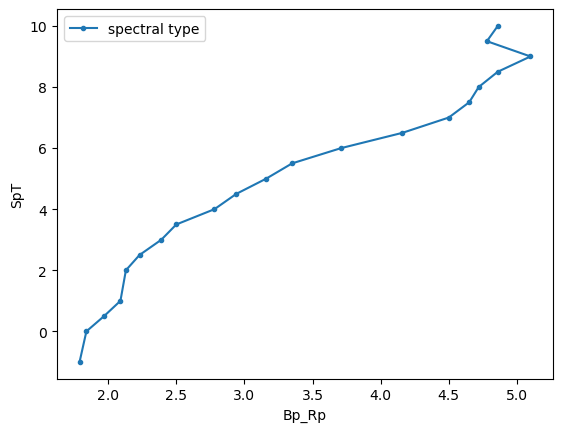

In [72]:
plt.plot(bp_rp_values, spectral_types, '.-',label = 'spectral type')
plt.legend()
plt.xlabel('Bp_Rp')
plt.ylabel('SpT')

In [74]:
def getSpT(bp_rp):
    if(bp_rp < 1.957):
        return 0
    elif(bp_rp < 2.13):
        return 1
    return round(float(interp_func(bp_rp)), 1)

In [96]:
test_a = 1.8
num = getSpT(test_a)
num

0

In [78]:
# df['bp_rp'].info()

brp_fill = [np.nan if val == '--' else val for val in df['bp_rp']]
brp_fill = np.array(brp_fill)
# brp_fill

/var/folders/63/qfkhcrwd7b72kqr1sr3jz6s80000gn/T/ipykernel_84217/2471182355.py:4: UserWarning: Warning: converting a masked element to nan.
  brp_fill = np.array(brp_fill)


In [80]:
arr = []

arr = [getSpT(val) for val in brp_fill]

In [82]:
df['bp_rp'][9]

1.494104

In [239]:
wright_sample = Table.read('../catalogs/Wright/2xGaiaDR3_wright.vot')
wright_sample

Name,RAJ2000,DEJ2000,Cluster,Dist,Vmag,V-K,SpT,logLx,Prot,M_,R_,L_,Teff,dcz,Lx_bol,recno,ra_epoch2000,dec_epoch2000,errHalfMaj,errHalfMin,errPosAng,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,astrometric_n_good_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,pseudocolour,pseudocolour_error,visibility_periods_used,ruwe,duplicated_source,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_mag,phot_rp_mean_flux,phot_rp_mean_mag,phot_bp_rp_excess_factor,bp_rp,dr2_radial_velocity,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,panstarrs1,sdssdr13,skymapper2,urat1,phot_g_mean_mag_error,phot_bp_mean_mag_error,phot_rp_mean_mag_error,phot_g_mean_mag_corrected,phot_g_mean_mag_error_corrected,phot_g_mean_flux_corrected,phot_bp_rp_excess_factor_corrected,ra_epoch2000_error,dec_epoch2000_error,ra_dec_epoch2000_corr,angDist
,,,,pc,mag,mag,,log(1e-07W),d,solMass,solRad,solLum,K,,,,deg,deg,arcsec,arcsec,deg,,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,mas,,,1 / um,1 / um,,,,e-/s,e-/s,mag,e-/s,e-/s,mag,e-/s,mag,,mag,km / s,km / s,,K,[cgs],,,,,mag,mag,mag,mag,mag,e-/s,,mas,mas,,arcsec
object,str11,str11,str8,float32,float32,float32,object,float32,float32,float32,float32,float32,int16,float32,float32,int32,float64,float64,float32,float32,float32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64,float64,uint8,float64,float64,uint8,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,float32,float32,int64,int64,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,00 08 06.43,+47 57 02.5,Field,8.3,12.40,4.73,,28.21,4.38,0.17,0.18,0.00,3201,0.00,-2.98,2,2.0267687135,47.95065916364,0.0004739,0.000328,115.04,393155984814848128,2.02594550825,0.0224,47.95067855187,0.0174,53.6232,0.0307,1749.0381,124.132,-124.056,0.028,4.362,0.022,410,7.3636,3823.37,0.243,91.3,31,--,--,20,1.269,False,507750.0,337.579,11.423243,87052.1,209.601,12.989094,659523.0,10.199821,1.47,2.789273,--,--,0,--,--,165540020262561550,--,--,690003258,0.002848,0.003823,0.003969,11.423243,0.002848,507750.0,0.021,0.4512,0.3585,-0.2772,0.138545
HD 691,00 11 22.44,+30 26 58.5,Field,34.0,7.95,1.95,K0,29.14,6.05,1.03,0.94,0.80,5460,0.72,-4.29,3,2.84348902524,30.44957616026,0.0003944,0.0003399,69.53,2861502032312723328,2.84456981862,0.018,30.44973439006,0.0155,29.3427,0.0237,1239.5153,212.64,209.639,0.024,35.601,0.021,317,0.0336,676.98,0.112,8.181,31,--,--,18,1.0,False,14889500.0,6813.86,7.755166,7656740.0,17344.8,8.128432,10423000.0,7.202911,1.214,0.925521,-3.07,0.17,12,5750.0,4.5,--,1237680333251870759,--,603001756,0.0028,0.003719,0.004159,7.755166,0.0028,14889500.0,0.004,0.3881,0.347,0.0973,0.042742
GJ NN3030,00 21 57.81,+49 12 38.0,Field,15.0,12.47,4.27,,28.25,6.17,0.24,0.24,0.01,3405,0.00,-3.28,4,5.49107645816,49.21051069292,0.0004644,0.0002925,129.33,394177942214683520,5.49249665241,0.0141,49.21035479188,0.0155,33.8712,0.0257,1315.6115,211.68,208.753,0.025,-35.08,0.023,548,17.7532,4065.32,0.196,70.54,31,--,--,21,1.584,False,338724.0,204.735,11.862751,73281.4,126.987,13.176058,411474.0,10.71204,1.431,2.464018,-12.39,0.56,13,4000.0,3.0,167050054919393502,--,--,697009795,0.002832,0.003365,0.003951,11.862751,0.002832,338724.0,0.03,0.4042,0.3712,-0.425,0.500563
HD 1835,00 22 51.79,-12 12 34.0,Field,20.0,6.39,1.54,G2,29.15,7.78,1.10,1.03,1.11,5687,0.76,-4.43,5,5.71578523386,-12.20943608877,0.0004609,0.0003412,73.42,2423493369021649920,5.71757863028,0.0209,-12.20916546134,0.0187,46.8742,0.027,1735.2573,399.061,394.388,0.028,60.893,0.022,221,0.621,840.76,0.145,20.21,31,--,--,13,1.028,False,60294000.0,32567.4,6.236681,32389700.0,64958.4,6

In [281]:
filtered_sample = wright_sample[wright_sample['SpT'] == 'K1']
filtered_sample

Name,RAJ2000,DEJ2000,Cluster,Dist,Vmag,V-K,SpT,logLx,Prot,M_,R_,L_,Teff,dcz,Lx_bol,recno,ra_epoch2000,dec_epoch2000,errHalfMaj,errHalfMin,errPosAng,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,astrometric_n_good_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,pseudocolour,pseudocolour_error,visibility_periods_used,ruwe,duplicated_source,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_mag,phot_rp_mean_flux,phot_rp_mean_mag,phot_bp_rp_excess_factor,bp_rp,dr2_radial_velocity,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,panstarrs1,sdssdr13,skymapper2,urat1,phot_g_mean_mag_error,phot_bp_mean_mag_error,phot_rp_mean_mag_error,phot_g_mean_mag_corrected,phot_g_mean_mag_error_corrected,phot_g_mean_flux_corrected,phot_bp_rp_excess_factor_corrected,ra_epoch2000_error,dec_epoch2000_error,ra_dec_epoch2000_corr,angDist
,,,,pc,mag,mag,,log(1e-07W),d,solMass,solRad,solLum,K,,,,deg,deg,arcsec,arcsec,deg,,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,mas,,,1 / um,1 / um,,,,e-/s,e-/s,mag,e-/s,e-/s,mag,e-/s,mag,,mag,km / s,km / s,,K,[cgs],,,,,mag,mag,mag,mag,mag,e-/s,,mas,mas,,arcsec
object,str11,str11,str8,float32,float32,float32,str5,float32,float32,float32,float32,float32,int16,float32,float32,int32,float64,float64,float32,float32,float32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64,float64,uint8,float64,float64,uint8,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,float32,float32,int64,int64,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
HD 10476,01 42 29.76,+20 16 06.6,Field,7.5,5.24,2.03,K1,26.79,35.20,0.92,0.83,0.48,5098,0.70,-6.44,27,25.62401041895,20.26851246753,0.0022724,0.0016112,68.7,96331172942614528,25.62258568628,0.1209,20.26551918226,0.0906,130.8234,0.1532,853.9957,737.63,-300.737,0.137,-673.539,0.106,148,4.2936,13195.4,0.781,617.3,31,--,--,13,1.262,False,188397000.0,186904.0,4.99968,91094000.0,95343.7,5.439818,135589000.0,4.417333,1.203,1.022485,-33.58,0.17,9,5250.0,4.5,--,--,--,552009948,0.002958,0.003013,0.004689,4.99968,0.002958,188397000.0,-0.016,2.1966,1.7131,0.2309,0.057031
HD 37394,05 41 20.34,+53 28 51.8,Field,12.0,6.21,2.03,K1,28.55,11.00,0.94,0.85,0.52,5155,0.70,-4.71,381,85.33473200015,53.4810580085,0.0004301,0.0003095,58.19,263916708025623680,85.33475293852,0.0201,53.47873143857,0.0168,81.4987,0.0253,3224.224,523.485,2.804,0.024,-523.477,0.021,293,-0.8882,1157.43,0.149,30.17,31,--,--,17,0.962,False,75608000.0,33758.1,5.990948,37191600.0,50861.0,6.41243,54716100.0,5.402607,1.216,1.009822,1.07,0.18,10,5250.0,4.5,--,--,--,718192484,0.002798,0.003161,0.004112,5.990948,0.002798,75608000.0,-0.002,0.4002,0.3472,0.2873,0.03956
HD 82558,09 32 25.57,-11 11 04.7,Field,18.0,7.82,2.03,K1,29.50,1.70,0.82,0.73,0.27,4693,0.68,-3.51,554,143.10653495652,-11.1846367341,0.0003883,0.0002871,115.04,5739942011185493888,143.10541120918,0.0197,-11.18448439131,0.0203,54.7362,0.0244,2240.7197,250.397,-248.04,0.023,34.277,0.018,549,2.4076,1393.49,0.139,20.15,31,--,--,17,1.073,False,19036600.0,22514.1,7.488392,8828600.0,36880.3,7.973812,14708200.0,6.828997,1.236,1.144815,6.21,0.38,7,5000.0,5.0,--,--,89276826,395052301,0.00304,0.005325,0.005256,7.488392,0.00304,19036600.0,0.006,0.3722,0.3077,-0.229,0.024935
HD 111813,12 51 38.41,+25 30 31.8,Field,38.0,9.09,2.03,K1,28.54,7.74,0.86,0.78,0.35,4876,0.70,-4.52,636,192.91003908337,25.50883073593,0.0003022,0.0001783,136.63,3958028490314315008,192.90934449884,0.0128,25.50866321949,0.0112,25.8776,0.0162,1602.22,145.997,-141.047,0.016,-37.692,0.016,354,-3.1148,547.99,0.063,5.033,31,--,--,17,0.884,False,5427040.0,1782.84,8.850959

In [291]:
np.max(filtered_sample['bp_rp'])

1.144815